In [2]:
import datajoint as dj
from annotation_schema import DatasetImage,CroppedDatasetImage,schema
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

[2024-04-02 16:24:41,831][INFO]: Connecting root@137.184.112.232:3306
[2024-04-02 16:24:42,425][INFO]: Connected root@137.184.112.232:3306


In [8]:
def load_dataset_image(path):
    import cv2
    image = cv2.imread(path,cv2.IMREAD_UNCHANGED)

    eye_path = path.replace('.pgm','.eye')
    y = pd.read_csv(eye_path,sep='\t').to_numpy()
    return image, y

In [23]:
flist = glob('faces_annotated/*.pgm')
for file in flist:
    print(file)
    x,y = load_dataset_image(file)
    DatasetImage.insert1(dict(image=x,y=y,fname=file),skip_duplicates=True)

faces_annotated/BioID_0001.pgm
faces_annotated/BioID_0002.pgm
faces_annotated/BioID_0003.pgm
faces_annotated/BioID_0004.pgm
faces_annotated/BioID_0005.pgm
faces_annotated/BioID_0006.pgm
faces_annotated/BioID_0007.pgm
faces_annotated/BioID_0008.pgm
faces_annotated/BioID_0009.pgm
faces_annotated/BioID_0010.pgm
faces_annotated/BioID_0011.pgm
faces_annotated/BioID_0012.pgm
faces_annotated/BioID_0013.pgm
faces_annotated/BioID_0014.pgm
faces_annotated/BioID_0015.pgm
faces_annotated/BioID_0016.pgm
faces_annotated/BioID_0017.pgm
faces_annotated/BioID_0018.pgm
faces_annotated/BioID_0019.pgm
faces_annotated/BioID_0020.pgm
faces_annotated/BioID_0021.pgm
faces_annotated/BioID_0022.pgm
faces_annotated/BioID_0023.pgm
faces_annotated/BioID_0024.pgm
faces_annotated/BioID_0025.pgm
faces_annotated/BioID_0026.pgm
faces_annotated/BioID_0027.pgm
faces_annotated/BioID_0028.pgm
faces_annotated/BioID_0029.pgm
faces_annotated/BioID_0030.pgm
faces_annotated/BioID_0031.pgm
faces_annotated/BioID_0032.pgm
faces_an

In [3]:
CroppedDatasetImage.populate(suppress_errors=True)

[2024-04-02 12:49:03,333][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:03,584][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:03,837][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:04,799][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:05,104][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:05,389][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:05,679][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:09,127][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:17,911][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:18,158][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:19,309][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:22,624][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:22,874][ERROR]: 'NoneType' object is not subscriptable
[2024-04-02 12:49:28,493][ERROR]: 'NoneType' object

[({'fname': 'faces_annotated/BioID_0053.pgm'},
  "TypeError: 'NoneType' object is not subscriptable"),
 ({'fname': 'faces_annotated/BioID_0054.pgm'},
  "TypeError: 'NoneType' object is not subscriptable"),
 ({'fname': 'faces_annotated/BioID_0055.pgm'},
  "TypeError: 'NoneType' object is not subscriptable"),
 ({'fname': 'faces_annotated/BioID_0058.pgm'},
  "TypeError: 'NoneType' object is not subscriptable"),
 ({'fname': 'faces_annotated/BioID_0059.pgm'},
  "TypeError: 'NoneType' object is not subscriptable"),
 ({'fname': 'faces_annotated/BioID_0060.pgm'},
  "TypeError: 'NoneType' object is not subscriptable"),
 ({'fname': 'faces_annotated/BioID_0061.pgm'},
  "TypeError: 'NoneType' object is not subscriptable"),
 ({'fname': 'faces_annotated/BioID_0072.pgm'},
  "TypeError: 'NoneType' object is not subscriptable"),
 ({'fname': 'faces_annotated/BioID_0099.pgm'},
  "TypeError: 'NoneType' object is not subscriptable"),
 ({'fname': 'faces_annotated/BioID_0100.pgm'},
  "TypeError: 'NoneType' o

# Unannotated

In [3]:
filez = glob('faces_unannotated/*')
from PIL import Image
from annotation_schema import UnannotatedImage,CroppedImage

In [20]:
for file in filez:
    im = Image.open(file)
    im = np.array(im)
    UnannotatedImage.insert1(dict(image=im,fname=file),skip_duplicates=True)


In [21]:
UnannotatedImage()

fname,image
faces_unannotated/dwaynejohnson-e1525871161379-867161994.jpg,=BLOB=
faces_unannotated/dwaynejohnson.jpg,=BLOB=
faces_unannotated/th-1629438813.jpg,=BLOB=
faces_unannotated/th-1665388010.jpg,=BLOB=
faces_unannotated/th-762508234.jpg,=BLOB=


In [23]:
CroppedImage.populate()

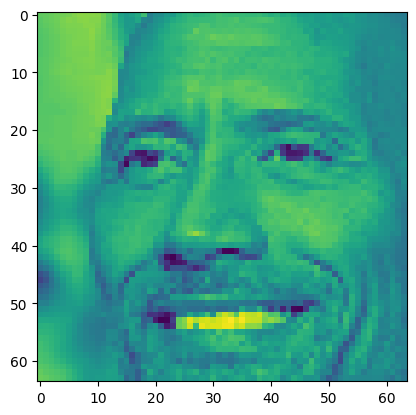

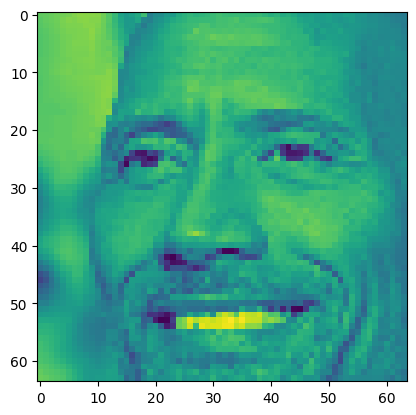

In [8]:
(CroppedImage & CroppedImage.fetch("KEY")[3]).show()

In [12]:
im = Image.open(filez[0])

In [18]:
np.array(im).shape

(1687, 3000, 3)

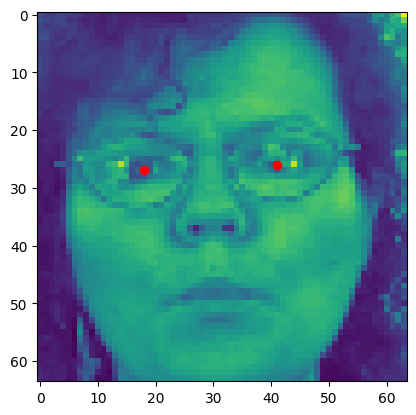

In [61]:
plt.figure()
plt.imshow(resized)
plt.scatter(new_y.reshape(-1,2)[:,0], new_y.reshape(-1,2)[:,1], c='r')

In [38]:
face_coords = np.array([123, 61, 270, 208], dtype=np.int32)
y = np.array([[228, 116, 166, 118]], dtype=np.int32)

transformed_y = transform_points(face_coords, y)
print("Transformed Points:", transformed_y)

ValueError: operands could not be broadcast together with shapes (1,4) (2,) 

In [34]:
y

array([[228, 116, 166, 118]])

In [31]:
y.shape

(1, 4)

In [28]:
# Example usage
face_coords = [100, 50, 300, 250]  # Example face bounding box in the original image
y = [150, 100, 250, 200]  # Example points within the face bounding box
original_size = (500, 400)  # Original image size (height, width)

transformed_y = transform_points(face_coords, y, original_size)
print("Transformed Points:", transformed_y)

Transformed Points: [16.0, 16.0, 48.0, 48.0]


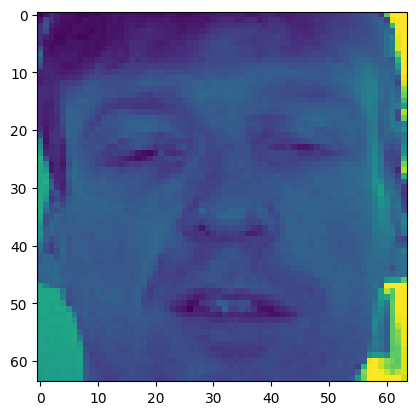

In [25]:
plt.figure()
plt.imshow(resized)